# 4. Training Models - Logistic Regression.ipynb

Logistic Regression model estimated probability:<br>
$\hat{p} = h_\theta (x) = \sigma(x^T\theta)$

$\sigma(t) = \frac{1}{1+e^{-t}}$

The cost function can be written as:
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^my^{(i)}log(\hat{p^{(i)}}) + (1-y^{(i)})log(1 - \hat{p^{(i)}})$$

This function is convex so it has precisely one global minimum
$$\frac{\delta J(\theta)}{\delta\theta} = \frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^{(i)}) - y^{(i)})x_j^{(i)}$$

In [7]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
# Lets use only the petal width to classify the data
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int32)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

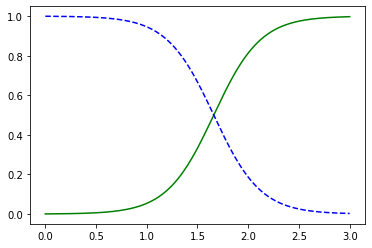

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica");
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica");

In [25]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression 

Logistic regression can be made to support multiple classes directly.

Softmax score for class k:<br>
$s_k(x) = x^T\theta^{(k)}$<br>
Softmax function: <br>
$\hat{p}_k = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{j=1}^{k}e^{s_j(x)}}$

Cross-entropy cost function:<br>
$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}\sum_{j=1}^{k} y_j^ilog(\hat{p_j^i})$

Cross entropy gradient vector for class k:<br>
$\nabla_{\theta^k}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{p_k^i} - y_k^i)x^i$

In [31]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

# lbfgs supports softmax regression; C applies l2 regularisation by default;
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]])

array([2])

In [32]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])